**Business Understanding**

1) The company is experiencing a high turnover rate, and leadership wants to understand who is leaving and why.

2) The company’s leadership wants to assess the effectiveness of senior leaders in retaining talent and managing high-performing teams.

3) HR wants to optimize the hiring process by identifying the most effective recruitment sources.

4) The leadership wants to understand diversity trends and whether they need to improve inclusivity in hiring.

5) There are concerns that some employees are working too many hours, leading to burnout and lower engagement.

6) The HR department suspects that high performers are not being fairly compensated.

7) HR wants to assess whether training programs are improving employee performance and retention.

In [1]:
import pandas as pd
df = pd.read_csv('/content/hr analytics data - employees attrition and leadership impact.csv')
df

,EmployeeID,DateOfHire,DateOfBirth,Gender,Department,JobTitle,EmploymentStatus,SupervisorID,SupervisorName,SupervisorLevel,...,YearsSinceLastTraining,JobSatisfactionScore,RetentionRisk,DiversityCategory,SkillsAssessmentScore,RecruitmentCost,TimeToFillPosition,InternalPromotion,WorkHoursPerWeek,StressLevelScore
0,1,22-03-2022,10-12-1966,Non-Binary,HR,Sales promotion account executive,Active,115,Michelle Dennis,VP,...,1,1.45,Low,Non-Diverse,50.26,1152.71,14,Yes,50,6.63
1,2,11-01-2020,15-12-1965,Non-Binary,HR,Sales executive,Terminated,419,Thomas Nelson,Director,...,2,1.40,Medium,Diverse,97.90,2810.24,23,Yes,50,5.68
2,3,30-10-2024,06-08-1964,Female,Marketing,"Research officer, trade union",Active,241,Miranda Barnes,Director,...,5,4.46,Medium,Non-Diverse,78.61,5945.55,39,No,55,8.51
3,4,18-11-2020,03-05-2001,Non-Binary,Marketing,Soil scientist,On Leave,765,Cheryl Kelley,Director,...,2,1.09,Medium,Non-Diverse,95.29,7837.52,25,Yes,56,3.34
4,5,13-05-2023,27-09-1993,Non-Binary,HR,Automotive engineer,Active,792,Maria Jenkins,VP,...,1,3.21,High,Diverse,70.09,1638.29,46,No,57,3.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,26-10-2018,11-10-1971,Non-Binary,Sales,Energy engineer,On Leave,815,Kaylee Edwards,VP,...,5,3.99,High,Diverse,69.31,4218.32,33,Yes,31,9.83
49996,49997,07-10-2017,27-04-1977,Non-Binary,Finance,"Administrator, arts",On Leave,511,Raymond Rogers,Manager,...,2,4.86,Medium,Non-Diverse,65.73,6192.78,32,Yes,56,6.66
49997,49998,16-10-2023,02-01-1984,Non-Binary,Sales,"Biochemist, clinical",On Leave,359,Sarah Schroeder,VP,...,4,1.97,Medium,Diverse,66.81,4299.03,45,No,51,7.10
49998,49999,22-09-2017,28-01-1985,Non-Binary,HR,Careers information officer,On Leave,281,Lisa Valentine,VP,...,5,2.98,Low,Non-Diverse,58.21,9425.87,52,Yes,31,8.39


**EDA ----> Exploratory Data Analysis**



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EmployeeID                  50000 non-null  int64  
 1   DateOfHire                  50000 non-null  object 
 2   DateOfBirth                 50000 non-null  object 
 3   Gender                      50000 non-null  object 
 4   Department                  50000 non-null  object 
 5   JobTitle                    50000 non-null  object 
 6   EmploymentStatus            50000 non-null  object 
 7   SupervisorID                50000 non-null  int64  
 8   SupervisorName              50000 non-null  object 
 9   SupervisorLevel             50000 non-null  object 
 10  ProjectsAssigned            50000 non-null  int64  
 11  ProjectsCompleted           50000 non-null  int64  
 12  PerformanceRating           50000 non-null  int64  
 13  Salary                      500

In [3]:
df.head(10)

,EmployeeID,DateOfHire,DateOfBirth,Gender,Department,JobTitle,EmploymentStatus,SupervisorID,SupervisorName,SupervisorLevel,...,YearsSinceLastTraining,JobSatisfactionScore,RetentionRisk,DiversityCategory,SkillsAssessmentScore,RecruitmentCost,TimeToFillPosition,InternalPromotion,WorkHoursPerWeek,StressLevelScore
0,1,22-03-2022,10-12-1966,Non-Binary,HR,Sales promotion account executive,Active,115,Michelle Dennis,VP,...,1,1.45,Low,Non-Diverse,50.26,1152.71,14,Yes,50,6.63
1,2,11-01-2020,15-12-1965,Non-Binary,HR,Sales executive,Terminated,419,Thomas Nelson,Director,...,2,1.40,Medium,Diverse,97.90,2810.24,23,Yes,50,5.68
2,3,30-10-2024,06-08-1964,Female,Marketing,"Research officer, trade union",Active,241,Miranda Barnes,Director,...,5,4.46,Medium,Non-Diverse,78.61,5945.55,39,No,55,8.51
3,4,18-11-2020,03-05-2001,Non-Binary,Marketing,Soil scientist,On Leave,765,Cheryl Kelley,Director,...,2,1.09,Medium,Non-Diverse,95.29,7837.52,25,Yes,56,3.34
4,5,13-05-2023,27-09-1993,Non-Binary,HR,Automotive engineer,Active,792,Maria Jenkins,VP,...,1,3.21,High,Diverse,70.09,1638.29,46,No,57,3.34
5,6,13-09-2024,28-08-1972,Male,Sales,Race relations officer,Terminated,249,Kristin Kelley,VP,...,2,4.43,Low,Diverse,55.33,9943.64,52,No,57,2.07
6,7,20-02-2024,19-07-1964,Female,IT,Podiatrist,Terminated,367,Julie Valencia,VP,...,2,2.53,Medium,Diverse,84.93,5566.87,11,No,38,5.48
7,8,23-05-2017,29-11-2005,Non-Binary,HR,Merchant navy officer,Active,555,Brenda Hamilton,Manager,...,2,2.56,Medium,Diverse,91.76,4887.04,36,No,57,9.99
8,9,31-08-2018,03-04-1995,Female,Marketing,Multimedia programmer,On Leave,546,Michael Zimmerman Jr.,Manager,...,5,3.41,Medium,Non-Diverse,91.18,6198.65,37,No,43,5.91
9,10,05-04-2021,20-02-1989,Non-Binary,Sales,Print production planner,On Leave,342,Mrs. Joyce Wilson,VP,...,2,4.46,Low,Non-Diverse,55.70,1763.61,23,No,48,1.80


In [4]:
df.tail(10)

,EmployeeID,DateOfHire,DateOfBirth,Gender,Department,JobTitle,EmploymentStatus,SupervisorID,SupervisorName,SupervisorLevel,...,YearsSinceLastTraining,JobSatisfactionScore,RetentionRisk,DiversityCategory,SkillsAssessmentScore,RecruitmentCost,TimeToFillPosition,InternalPromotion,WorkHoursPerWeek,StressLevelScore
49990,49991,17-07-2015,10-07-1996,Non-Binary,IT,Data scientist,Active,196,Bonnie Humphrey,Manager,...,1,4.31,Medium,Non-Diverse,61.97,9606.35,10,Yes,55,5.66
49991,49992,15-11-2022,20-10-1967,Non-Binary,HR,Pathologist,Terminated,813,Jessica Mccarthy,Manager,...,3,3.50,High,Diverse,70.74,2006.76,19,Yes,40,4.99
49992,49993,04-12-2017,06-06-1999,Non-Binary,Sales,"Geneticist, molecular",Terminated,191,Amanda Flores,VP,...,4,1.60,Low,Diverse,89.35,8738.06,26,Yes,32,6.54
49993,49994,30-03-2021,16-05-1993,Female,Sales,Public house manager,Active,492,Susan Osborn,VP,...,2,3.92,Low,Non-Diverse,86.75,2217.65,13,No,38,4.56
49994,49995,06-11-2018,15-10-1973,Male,Marketing,Fashion designer,On Leave,356,Heather Davies,Manager,...,0,1.16,Low,Diverse,67.16,3812.39,7,No,36,7.17
49995,49996,26-10-2018,11-10-1971,Non-Binary,Sales,Energy engineer,On Leave,815,Kaylee Edwards,VP,...,5,3.99,High,Diverse,69.31,4218.32,33,Yes,31,9.83
49996,49997,07-10-2017,27-04-1977,Non-Binary,Finance,"Administrator, arts",On Leave,511,Raymond Rogers,Manager,...,2,4.86,Medium,Non-Diverse,65.73,6192.78,32,Yes,56,6.66
49997,49998,16-10-2023,02-01-1984,Non-Binary,Sales,"Biochemist, clinical",On Leave,359,Sarah Schroeder,VP,...,4,1.97,Medium,Diverse,66.81,4299.03,45,No,51,7.10
49998,49999,22-09-2017,28-01-1985,Non-Binary,HR,Careers information officer,On Leave,281,Lisa Valentine,VP,...,5,2.98,Low,Non-Diverse,58.21,9425.87,52,Yes,31,8.39
49999,50000,18-02-2021,04-10-1978,Male,IT,"Accountant, chartered public finance",Active,455,Marie Lopez,Director,...,4,2.81,Medium,Diverse,76.28,6390.33,10,Yes,57,8.40


In [5]:
df.describe()

,EmployeeID,SupervisorID,ProjectsAssigned,ProjectsCompleted,PerformanceRating,Salary,Bonus,YearsAtCompany,YearsInCurrentRole,TrainingHours,...,TeamSize,PromotionCount,WorkFromHomeDays,YearsSinceLastTraining,JobSatisfactionScore,SkillsAssessmentScore,RecruitmentCost,TimeToFillPosition,WorkHoursPerWeek,StressLevelScore
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,500.497060,10.028620,10.012900,2.997480,75090.043952,10029.174125,5.002400,5.004720,50.100900,...,27.420280,2.496860,10.002640,2.488620,2.991840,74.966885,5477.197624,32.483960,44.987400,5.511490
std,14433.901067,288.080807,6.053701,6.042273,1.416825,25868.273525,5786.474683,3.173836,3.168807,29.109243,...,13.324633,1.711645,6.047919,1.711493,1.154465,14.420894,2598.414504,16.180595,8.947637,2.602615
min,1.000000,1.000000,0.000000,0.000000,1.000000,30000.200000,0.250000,0.000000,0.000000,0.000000,...,5.000000,0.000000,0.000000,0.000000,1.000000,50.000000,1000.530000,5.000000,30.000000,1.000000
25%,12500.750000,250.000000,5.000000,5.000000,2.000000,52884.180000,5034.715000,2.000000,2.000000,25.000000,...,16.000000,1.000000,5.000000,1.000000,1.990000,62.540000,3219.140000,19.000000,37.000000,3.250000
50%,25000.500000,502.000000,10.000000,10.000000,3.000000,75245.525000,10027.525000,5.000000,5.000000,50.000000,...,27.000000,2.000000,10.000000,2.000000,2.980000,74.950000,5469.020000,32.000000,45.000000,5.530000
75%,37500.250000,749.000000,15.000000,15.000000,4.000000,97426.855000,15036.405000,8.000000,8.000000,75.000000,...,39.000000,4.000000,15.000000,4.000000,4.000000,87.430000,7724.915000,47.000000,53.000000,7.760000
max,50000.000000,1000.000000,20.000000,20.000000,5.000000,119994.800000,19999.910000,10.000000,10.000000,100.000000,...,50.000000,5.000000,20.000000,5.000000,5.000000,100.000000,9999.950000,60.000000,60.000000,10.000000


In [6]:
df.nunique()

,0
EmployeeID,50000
DateOfHire,3653
DateOfBirth,16556
Gender,3
Department,5
JobTitle,639
EmploymentStatus,3
SupervisorID,1000
SupervisorName,40158
SupervisorLevel,3


In [7]:
# Check data types
df.dtypes

,0
EmployeeID,int64
DateOfHire,object
DateOfBirth,object
Gender,object
Department,object
JobTitle,object
EmploymentStatus,object
SupervisorID,int64
SupervisorName,object
SupervisorLevel,object


In [8]:
# Check nulls
df.isnull().sum()

,0
EmployeeID,0
DateOfHire,0
DateOfBirth,0
Gender,0
Department,0
JobTitle,0
EmploymentStatus,0
SupervisorID,0
SupervisorName,0
SupervisorLevel,0


In [9]:
# Calculate the percentage of nulls
((pd.DataFrame({'Pct_Null':df.isnull().sum()})) / df.shape[0]) * 100

,Pct_Null
EmployeeID,0.000
DateOfHire,0.000
DateOfBirth,0.000
Gender,0.000
Department,0.000
JobTitle,0.000
EmploymentStatus,0.000
SupervisorID,0.000
SupervisorName,0.000
SupervisorLevel,0.000


In [10]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

In [11]:
# Removing the EmployeeID column to ensure that no duplicates
df.drop(columns = 'EmployeeID', inplace = True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.columns

Index(['DateOfHire', 'DateOfBirth', 'Gender', 'Department', 'JobTitle',
       'EmploymentStatus', 'SupervisorID', 'SupervisorName', 'SupervisorLevel',
       'ProjectsAssigned', 'ProjectsCompleted', 'PerformanceRating', 'Salary',
       'Bonus', 'YearsAtCompany', 'YearsInCurrentRole', 'TrainingHours',
       'OvertimeHours', 'Absences', 'HireSource', 'EmployeeEngagementScore',
       'TerminationDate', 'ReasonForLeaving', 'LastPromotionDate',
       'SeniorLeader', 'TeamSize', 'PromotionCount', 'WorkFromHomeDays',
       'PerformanceImprovementPlan', 'YearsSinceLastTraining',
       'JobSatisfactionScore', 'RetentionRisk', 'DiversityCategory',
       'SkillsAssessmentScore', 'RecruitmentCost', 'TimeToFillPosition',
       'InternalPromotion', 'WorkHoursPerWeek', 'StressLevelScore'],
      dtype='object')

**Check irrelevant columns:**

(SupervisorID, SupervisorName, and SupervisorLevel, YearsAtCompany, YearsInCurrentRole, LastPromotionDate, PromotionCount, InternalPromotion)

where we are not analyzing any thing related to these columns

**preprocessing (cleaning data)**

**Removing irrelevant columns**

In [14]:
df.drop(columns = ['SupervisorID', 'SupervisorName', 'SupervisorLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'LastPromotionDate', 'PromotionCount', 'InternalPromotion'], inplace = True)

In [15]:
df.columns

Index(['DateOfHire', 'DateOfBirth', 'Gender', 'Department', 'JobTitle',
       'EmploymentStatus', 'ProjectsAssigned', 'ProjectsCompleted',
       'PerformanceRating', 'Salary', 'Bonus', 'TrainingHours',
       'OvertimeHours', 'Absences', 'HireSource', 'EmployeeEngagementScore',
       'TerminationDate', 'ReasonForLeaving', 'SeniorLeader', 'TeamSize',
       'WorkFromHomeDays', 'PerformanceImprovementPlan',
       'YearsSinceLastTraining', 'JobSatisfactionScore', 'RetentionRisk',
       'DiversityCategory', 'SkillsAssessmentScore', 'RecruitmentCost',
       'TimeToFillPosition', 'WorkHoursPerWeek', 'StressLevelScore'],
      dtype='object')

In [16]:
df.shape[1]

31

In [17]:
df.drop(df[df['Gender'] == 'Non-Binary'].index, inplace=True)

In [18]:
df['Gender'].value_counts()

,count
Gender,
Male,16792
Female,16540


**Handling Data Types**

In [19]:
# Converting datatype to datetime format
# dayfirst = True ------> Ensures that the day is correctly interpreted when ambiguous.
# errors = 'coerce' ----> convert the datatype from nulls to NaT
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'], dayfirst = True, errors = 'coerce')
df['DateOfHire'] = pd.to_datetime(df['DateOfHire'], dayfirst = True, errors = 'coerce')
df['TerminationDate'] = pd.to_datetime(df['TerminationDate'], dayfirst = True, errors = 'coerce')

In [20]:
df.dtypes

,0
DateOfHire,datetime64[ns]
DateOfBirth,datetime64[ns]
Gender,object
Department,object
JobTitle,object
EmploymentStatus,object
ProjectsAssigned,int64
ProjectsCompleted,int64
PerformanceRating,int64
Salary,float64


**Handling Nulls**

In [21]:
# Calculate the percentage of nulls
((pd.DataFrame({'Pct_Null':df.isnull().sum()})) / df.shape[0]) * 100

,Pct_Null
DateOfHire,0.000000
DateOfBirth,0.000000
Gender,0.000000
Department,0.000000
JobTitle,0.000000
EmploymentStatus,0.000000
ProjectsAssigned,0.000000
ProjectsCompleted,0.000000
PerformanceRating,0.000000
Salary,0.000000


In [22]:
df.loc[(df["TerminationDate"].isnull()) & (df["ReasonForLeaving"].isnull()), "ReasonForLeaving"] = "Still Employed"

In [23]:
df.loc[(df["TerminationDate"].isnull()) & (df["ReasonForLeaving"].isnull())].shape[0]

0

In [24]:
df.loc[(df["TerminationDate"].notnull()) & (df["ReasonForLeaving"].isnull())].shape[0]

2860

In [25]:
df.loc[(df['TerminationDate'].notnull()) & (df['ReasonForLeaving'].isnull()), 'ReasonForLeaving'] = 'No Reason'

In [26]:
df.loc[(df["TerminationDate"].notnull()) & (df["ReasonForLeaving"].isnull())].shape[0]

0

In [27]:
df.isnull().sum()

,0
DateOfHire,0
DateOfBirth,0
Gender,0
Department,0
JobTitle,0
EmploymentStatus,0
ProjectsAssigned,0
ProjectsCompleted,0
PerformanceRating,0
Salary,0


In [28]:
df["TerminationDate"]

,TerminationDate
2,NaT
5,2024-09-17
6,2025-01-25
8,NaT
10,NaT
...,...
49986,2025-01-25
49989,NaT
49993,NaT
49994,NaT


In [29]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.1 MB/s eta 0:00:00


In [30]:
from faker import Faker
import random

fake = Faker()

def generate_name(gender):
    if gender == 'Male':
        return fake.name_male()
    elif gender == 'Female':
        return fake.name_female()
    else:
        return fake.name()

df['EmployeeName'] = df['Gender'].apply(generate_name)

In [31]:
df['EmployeeName']

,EmployeeName
2,Jessica Wright
5,Darren Carlson
6,Kara Maldonado
8,Elizabeth Leon
10,Elaine Williamson
...,...
49986,Mark Carter MD
49989,Rhonda Carey
49993,Allison Lee
49994,Joshua Graves


In [32]:
new_order = ['EmployeeName', 'DateOfHire', 'DateOfBirth', 'Gender', 'Department', 'JobTitle',
       'EmploymentStatus', 'ProjectsAssigned', 'ProjectsCompleted', 'PerformanceRating', 'Salary',
       'Bonus', 'TrainingHours', 'OvertimeHours', 'Absences', 'HireSource', 'EmployeeEngagementScore',
       'TerminationDate', 'ReasonForLeaving', 'SeniorLeader', 'TeamSize', 'WorkFromHomeDays',
       'PerformanceImprovementPlan', 'YearsSinceLastTraining',
       'JobSatisfactionScore', 'RetentionRisk', 'DiversityCategory',
       'SkillsAssessmentScore', 'RecruitmentCost', 'TimeToFillPosition',
       'WorkHoursPerWeek', 'StressLevelScore']
df = df.reindex(columns = new_order)
df

,EmployeeName,DateOfHire,DateOfBirth,Gender,Department,JobTitle,EmploymentStatus,ProjectsAssigned,ProjectsCompleted,PerformanceRating,...,PerformanceImprovementPlan,YearsSinceLastTraining,JobSatisfactionScore,RetentionRisk,DiversityCategory,SkillsAssessmentScore,RecruitmentCost,TimeToFillPosition,WorkHoursPerWeek,StressLevelScore
2,Jessica Wright,2024-10-30,1964-08-06,Female,Marketing,"Research officer, trade union",Active,9,4,5,...,Yes,5,4.46,Medium,Non-Diverse,78.61,5945.55,39,55,8.51
5,Darren Carlson,2024-09-13,1972-08-28,Male,Sales,Race relations officer,Terminated,0,12,3,...,Yes,2,4.43,Low,Diverse,55.33,9943.64,52,57,2.07
6,Kara Maldonado,2024-02-20,1964-07-19,Female,IT,Podiatrist,Terminated,18,6,1,...,No,2,2.53,Medium,Diverse,84.93,5566.87,11,38,5.48
8,Elizabeth Leon,2018-08-31,1995-04-03,Female,Marketing,Multimedia programmer,On Leave,19,13,5,...,No,5,3.41,Medium,Non-Diverse,91.18,6198.65,37,43,5.91
10,Elaine Williamson,2018-06-03,1959-10-03,Female,HR,Quantity surveyor,On Leave,0,17,3,...,Yes,1,4.71,Low,Non-Diverse,55.26,2252.78,6,58,4.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49986,Mark Carter MD,2024-07-11,1990-03-19,Male,Sales,Curator,Terminated,11,19,5,...,Yes,3,1.63,Medium,Non-Diverse,73.62,4831.94,59,35,7.71
49989,Rhonda Carey,2017-12-05,1989-04-28,Female,Finance,"Clinical scientist, histocompatibility and imm...",Active,15,15,3,...,Yes,2,3.65,Medium,Non-Diverse,51.68,4287.98,32,40,1.35
49993,Allison Lee,2021-03-30,1993-05-16,Female,Sales,Public house manager,Active,13,2,1,...,No,2,3.92,Low,Non-Diverse,86.75,2217.65,13,38,4.56
49994,Joshua Graves,2018-11-06,1973-10-15,Male,Marketing,Fashion designer,On Leave,18,2,3,...,No,0,1.16,Low,Diverse,67.16,3812.39,7,36,7.17


**Visualization**


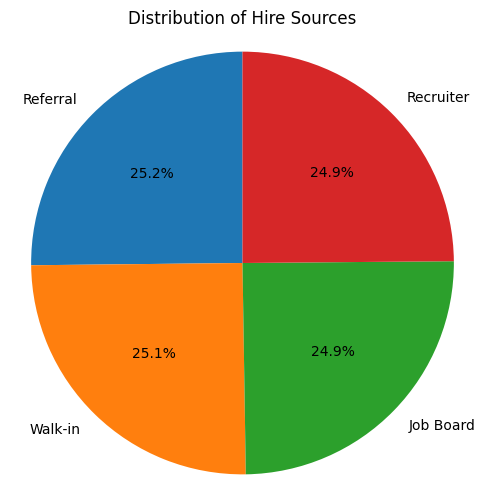

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
HireSource_counts = df['HireSource'].value_counts()

#Pie Chart
plt.figure(figsize=(6,6))
plt.pie(HireSource_counts, labels=HireSource_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Hire Sources')
plt.axis('equal')
plt.show()


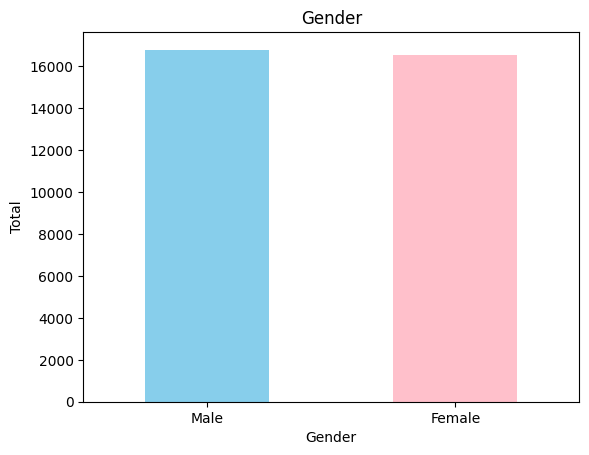

In [34]:
gender_counts = df['Gender'].value_counts()

#Bar Chart
gender_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Total')
plt.xticks(rotation=0)
plt.show()


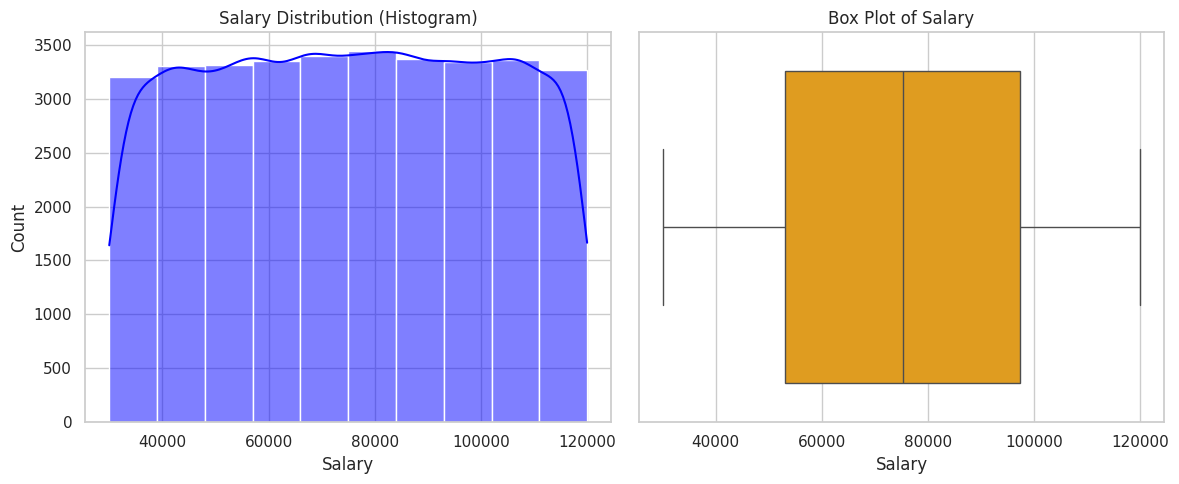

In [35]:
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(df['Salary'], bins=10, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Salary Distribution (Histogram)')
axes[0].set_xlabel('Salary')

# Box Plot
sns.boxplot(x=df['Salary'], ax=axes[1], color='orange')
axes[1].set_title('Box Plot of Salary')
axes[1].set_xlabel('Salary')

plt.tight_layout()
plt.show()

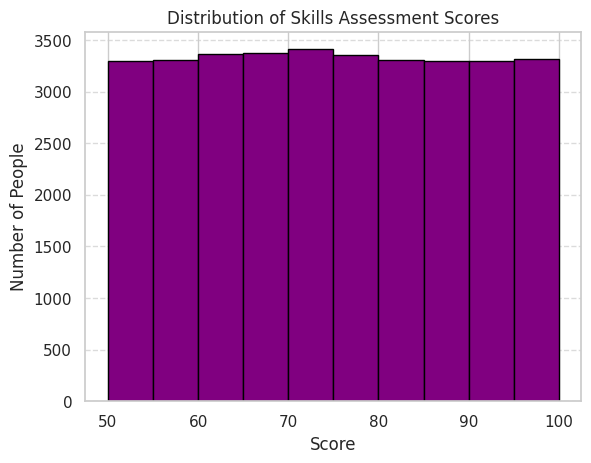

In [36]:
plt.hist(df['SkillsAssessmentScore'], bins=10, color='purple', edgecolor='black')
plt.title('Distribution of Skills Assessment Scores')
plt.xlabel('Score')
plt.ylabel('Number of People')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [38]:
df.to_csv('HR Data1.csv', index=False)